# <div style="padding: 15px 20px; color: white; margin: 0; font-size: 120%; text-align: center; display: inline-block; text-shadow: 3px 3px 5px rgba(0, 0, 0, 0.3); border-radius: 25px; background: linear-gradient(135deg, #1976D2, #2196F3); box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); overflow: hidden; font-weight: 800;">Exploratory Data Analysis on IPL</div>

### About Dataset
Contex

Now that this year's IPL is over, let's not curb our cricket love and start analyzing the whole of IPL with this latest and complete Indian Premier League dataset. It contains the match descriptions, results, winners, player of the matches, ball by ball dataset and much more. So, stop thinking and start analyzing .

Content
This dataset consists of two seperate CSV files : matches and deliveries. These files contain the information of each match summary and ball by ball details, respectively.

### <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:center;display: inline-block;border-radius:60px;background-color:black;overflow:hidden;font-weight:800">Importing</div>

In [2]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
from scipy.stats import norm

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv('IPL Matches 2008-2020.csv')
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [180]:
n_rows, n_columns = df.shape

print("Total number of rows = ", n_rows)
print("Total number of columns = ", n_columns)

Total number of rows =  816
Total number of columns =  17


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

### <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:center;display: inline-block;border-radius:60px;background-color:black;overflow:hidden;font-weight:800">Data Cleaning</div>

There two columns ("METHOD" column and "NEUTRAL_VENUE") Column consists of only NaN values, removing it streamlines the dataset by eliminating irrelevant information. This allows for a more focused analysis on the remaining variables.

In [182]:
df=df.drop("method",axis=1)
df=df.drop("neutral_venue",axis=1)

Same here also dropping the "ELIMINATOR" column its contains 812 NAN values

In [183]:
df=df.drop("eliminator",axis=1)

df.head()

,id,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan


In [184]:
null_values=df.isnull().sum()
print(null_values)

id                  0
city               13
date                0
player_of_match     4
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
umpire1             0
umpire2             0
dtype: int64


In the dataset, there are null values present in five columns. These null values can be filled using appropriate methods like No Null values (or)mean, median, (or) mode imputation.

In [187]:
df['city'] = df['city'].fillna('NO_CITY')

df['player_of_match'] = df['player_of_match'].fillna('No_player_of_the_match')

df['winner'] = df['winner'].fillna('no_winner')

df['result'] = df['result'].fillna('no_result')

In [188]:
df.describe()

,id,result_margin
count,8.160000e+02,799.000000
mean,7.563496e+05,17.321652
std,3.058943e+05,22.068427
min,3.359820e+05,1.000000
25%,5.012278e+05,6.000000
50%,7.292980e+05,8.000000
75%,1.082626e+06,19.500000
max,1.237181e+06,146.000000


In [189]:
df['result_margin']=df['result_margin'].fillna(df['result_margin'].mean())

In [190]:
# Converting 'result_margin' column into integers

df['result_margin'] = df['result_margin'].astype(int)
df.head()

,id,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,BF Bowden,K Hariharan


The dataset has been updated by filling the null values, so now there are no more missing data.

In [191]:
df.isna().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
umpire1            0
umpire2            0
dtype: int64

### <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:center;display: inline-block;border-radius:60px;background-color:black;overflow:hidden;font-weight:800">Data Manipulation</div>

In the IPL dataset,I have a column called "winner" that currently contains the full names of the teams. To make it more concise, i create a new column called "winner_team" with the abbreviated or shortcut names for each team.This will help in simplifying the dataset and make it easier to analyze.

In [192]:

team = {
    'Kolkata Knight Riders': 'KKR',
    'Chennai Super Kings': 'CSK',
    'Mumbai Indians': 'MI',
   'Sunrisers Hyderabad': 'SRH',
    'Delhi Daredevils' : 'DD',
    'Kings XI Punjab': 'KXIP',
    'Royal Challengers Bangalore':'RCB',
    'Deccan Charges':'DCs',
    'Delhi Capitals':'DC',
    'Gujrat Lions':'GL',
    'Pune Warriors':'PW',
    'Rising Pune Supergiant':'RPG',
    'Kochi Tuskers Kerala':'KTK',
    'Rising Pune Supergiants':'RPGs',
    'no winner':'NO'
    }
df['wins'] = df['winner'].map(team)


Renaming the 'result' column as 'wonby',that provides more meaningful and descriptive name to represent the outcome of the matches in the DataFrame. This will make it easier to understand and analyze the data based on the winning team.

In [194]:
df.rename(columns={'result': 'wonby'}, inplace=True)
df.head()

,id,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,wonby,result_margin,umpire1,umpire2,wins
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,Asad Rauf,RE Koertzen,KKR
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,MR Benson,SL Shastri,CSK
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,Aleem Dar,GA Pratapkumar,DD
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,SJ Davis,DJ Harper,RCB
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,BF Bowden,K Hariharan,KKR


By changing the 'date' column to the 'Season' in dataset. This allows to analyze the data on a yearly basis rather than looking at specific dates. It simplifies the data and helps identify trends or patterns that occur over the years. It provides a higher-level perspective of the data and allows for more meaningful insights.

In [195]:
df['season'] = pd.to_datetime(df['date']).dt.year
df.head()

,id,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,wonby,result_margin,umpire1,umpire2,wins,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,Asad Rauf,RE Koertzen,KKR,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,MR Benson,SL Shastri,CSK,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,Aleem Dar,GA Pratapkumar,DD,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,SJ Davis,DJ Harper,RCB,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,BF Bowden,K Hariharan,KKR,2008


In [196]:
df['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2020    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

Changing the position of "season" column from last to 2 position and also "wins" column to 11 position

In [197]:
df.insert(2,"season", df.pop("season"))
df.head()

,id,city,season,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,wonby,result_margin,umpire1,umpire2,wins
0,335982,Bangalore,2008,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,Asad Rauf,RE Koertzen,KKR
1,335983,Chandigarh,2008,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,MR Benson,SL Shastri,CSK
2,335984,Delhi,2008,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,Aleem Dar,GA Pratapkumar,DD
3,335985,Mumbai,2008,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,SJ Davis,DJ Harper,RCB
4,335986,Kolkata,2008,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,BF Bowden,K Hariharan,KKR


In [198]:
df.insert(11,"wins",df.pop("wins"))
df.head()

,id,city,season,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,wins,wonby,result_margin,umpire1,umpire2
0,335982,Bangalore,2008,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,KKR,runs,140,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,CSK,runs,33,MR Benson,SL Shastri
2,335984,Delhi,2008,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,DD,wickets,9,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,RCB,wickets,5,SJ Davis,DJ Harper
4,335986,Kolkata,2008,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,KKR,wickets,5,BF Bowden,K Hariharan


### <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:center;display: inline-block;border-radius:60px;background-color:black;overflow:hidden;font-weight:800">Data Analysis & Visualization</div>

> There are 32 cities in the IPL dataset,
> so I would like to do some analysis on **specific** **cities** where mostly ipl used to watch like 'Bangalore','Chennai','Delhi','Hyderabad','Mumbai',
                    'Kolkata','Pune'

In [199]:
city_names_list = ['Bangalore','Chennai','Delhi','Hyderabad','Mumbai',
                    'Kolkata','Pune']
wins_names_list = ['Rajasthan Royals','Royal Challengers Bangalore','Delhi Capitals','Mumbai Indians','Sunrisers Hyderabad','Chennai Super Kings','Pune Warriors','Deccan Chargers','Rajasthan']
                      
df_city_filtered = df[df['city'].isin(city_names_list)]
df_wins_filtered = df[df['wins'].isin(wins_names_list)]

In [200]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outliers = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)

Rows with outliers:
          id        city  season        date player_of_match  \
0     335982   Bangalore    2008  2008-04-18     BB McCullum   
9     335991  Chandigarh    2008  2008-04-25   KC Sangakkara   
18    336000      Jaipur    2008  2008-05-01     SA Asnodkar   
37    336019  Chandigarh    2008  2008-05-28        SE Marsh   
41    336023      Jaipur    2008  2008-05-17        GC Smith   
..       ...         ...     ...         ...             ...   
794  1216530       Dubai    2020  2020-11-01      PJ Cummins   
803  1216539       Dubai    2020  2020-09-25         PP Shaw   
804  1216540     Sharjah    2020  2020-10-12  AB de Villiers   
806  1216542       Dubai    2020  2020-10-08     JM Bairstow   
812  1237177       Dubai    2020  2020-11-05       JJ Bumrah   

                                          venue                        team1  \
0                         M Chinnaswamy Stadium  Royal Challengers Bangalore   
9    Punjab Cricket Association Stadium, Mohali    

C:\Users\sabim\AppData\Local\Temp\ipykernel_6576\3890532887.py:7: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [201]:
outliers = ((df < (Q1 - threshold * IQR)).align(df > (Q3 + threshold * IQR), axis=1, copy=False)[0]).any(axis=1)

C:\Users\sabim\AppData\Local\Temp\ipykernel_6576\3753132612.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



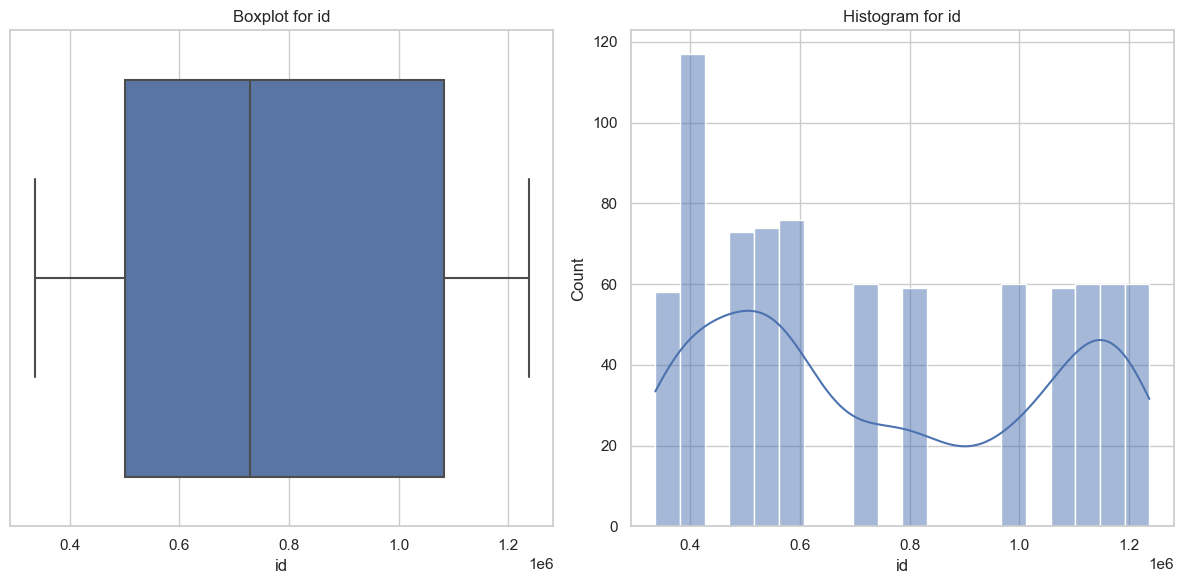

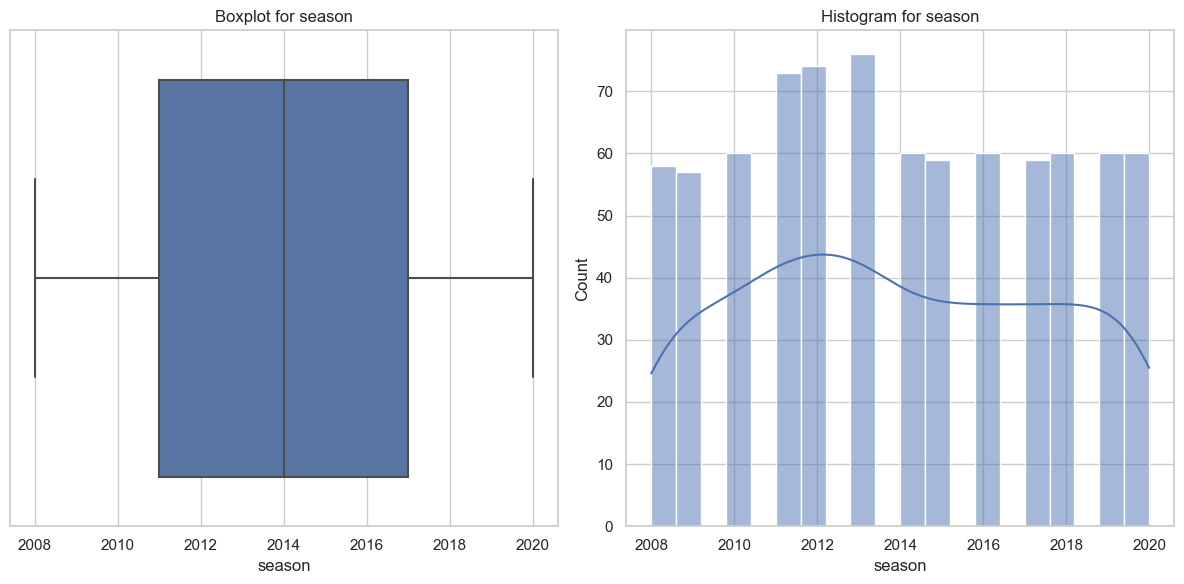

In [202]:
import seaborn as sns

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

    plt.subplot(1, 2, 2)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')

    plt.tight_layout()
    plt.show()

In [203]:
df_city_filtered.shape, df_wins_filtered.shape,

((476, 16), (0, 16))

In [204]:
df_city_sort_by_result_margin=df_city_filtered.sort_values("result_margin", ascending = False)
df_city_sort_by_result_margin.sample(5)

,id,city,season,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,wins,wonby,result_margin,umpire1,umpire2
47,336029,Chennai,2008,2008-05-21,A Kumble,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,RCB,runs,14,DJ Harper,I Shivram
276,548334,Mumbai,2012,2012-04-22,SE Marsh,Wankhede Stadium,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,KXIP,wickets,6,S Ravi,RJ Tucker
204,501228,Mumbai,2011,2011-04-27,DE Bollinger,Dr DY Patil Sports Academy,Pune Warriors,Chennai Super Kings,Pune Warriors,bat,Chennai Super Kings,CSK,wickets,8,Asad Rauf,SL Shastri
662,1136587,Pune,2018,2018-04-28,RG Sharma,Maharashtra Cricket Association Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,MI,wickets,8,CB Gaffaney,Nitin Menon
600,1082614,Mumbai,2017,2017-04-22,MJ McClenaghan,Wankhede Stadium,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,Mumbai Indians,MI,runs,14,A Nand Kishore,S Ravi


In [205]:
winning_counts = df['wins'].value_counts()
print(winning_counts)

MI      120
CSK     106
KKR      99
RCB      91
KXIP     88
DD       67
SRH      66
DC       19
PW       12
RPG      10
KTK       6
RPGs      5
Name: wins, dtype: int64


In [206]:
correlation_matrix = df.corr()
print(correlation_matrix)

                     id    season  result_margin
id             1.000000  0.987786      -0.010510
season         0.987786  1.000000      -0.002301
result_margin -0.010510 -0.002301       1.000000


> Analysis: MI have the highest number of IPL wins

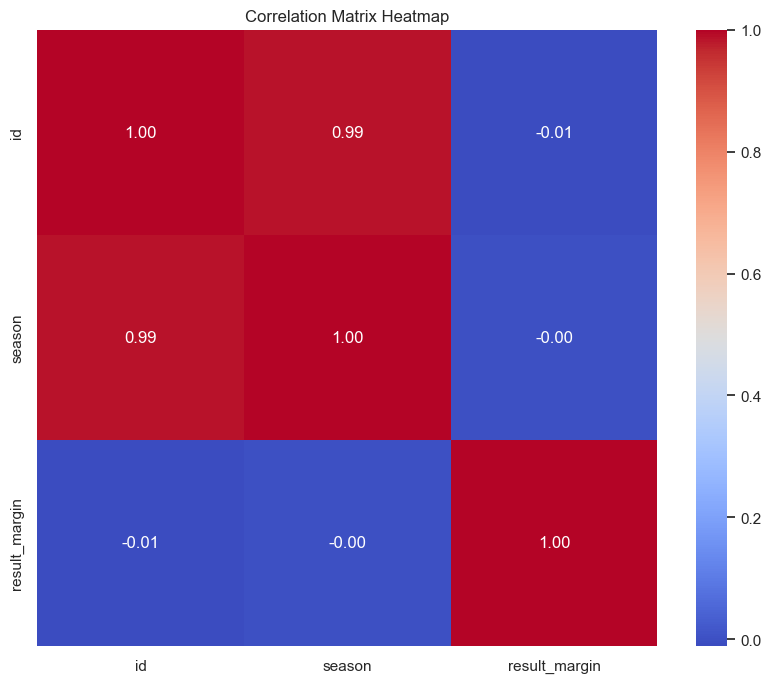

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

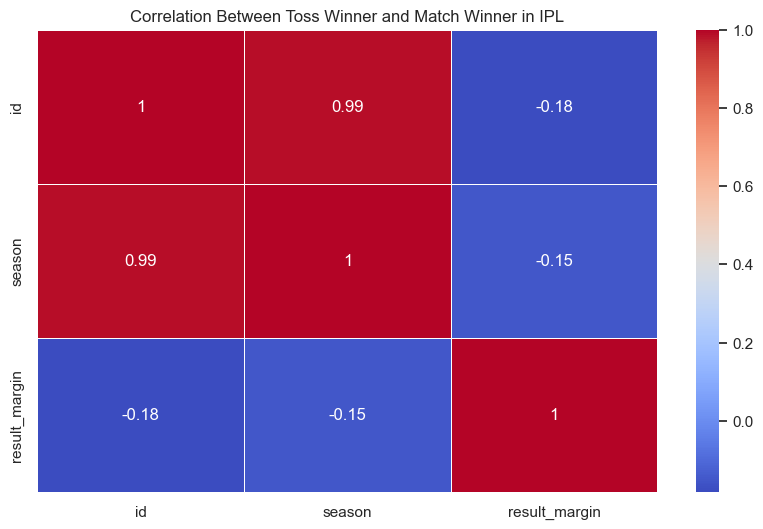

In [208]:
toss_match_correlation = df[df['toss_winner'] == df['winner']]

sns.set(font_scale=1)
plt.figure(figsize=(10, 6))
sns.heatmap(toss_match_correlation.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Toss Winner and Match Winner in IPL")
plt.show()

**Number of matches hosted in each city**

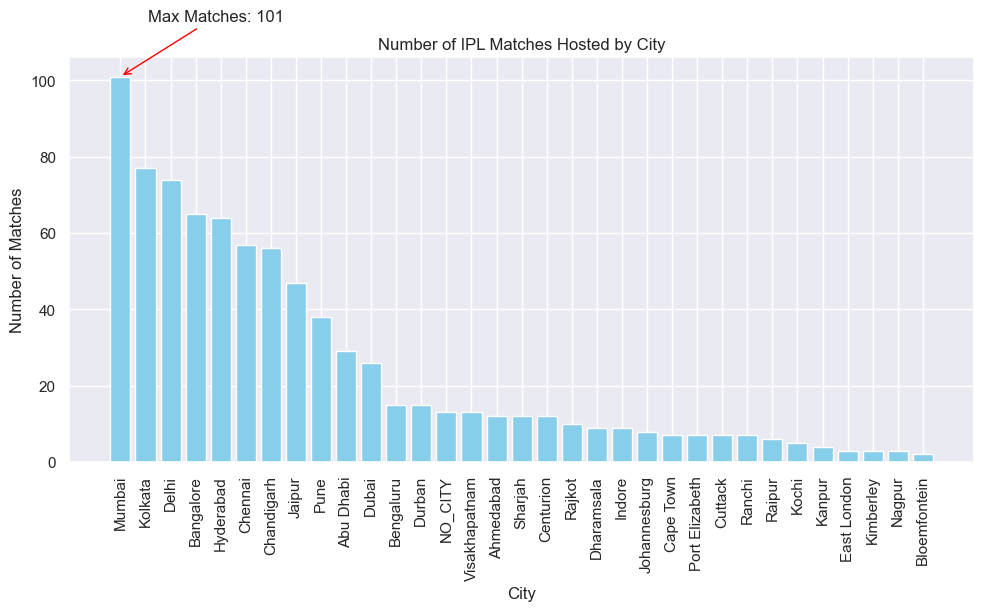

Mumbai has hosted the maximum number of IPL matches with 101 matches.


In [209]:
city_matches_count = df['city'].value_counts()

max_hosted_city = city_matches_count.idxmax()
max_matches = city_matches_count.max()

city_names = city_matches_count.index.astype(str)

plt.figure(figsize=(10, 6))
plt.bar(city_names, city_matches_count, color='skyblue')
plt.title('Number of IPL Matches Hosted by City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.tight_layout()
plt.annotate(f'Max Matches: {max_matches}', (max_hosted_city, max_matches), xytext=(20, 40),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.show()

print(f"{max_hosted_city} has hosted the maximum number of IPL matches with {max_matches} matches.")

In [210]:
colors=['#1f77b4', '#ffff00',' #2ca02c', '#d62728', '#9467bd' ,'#8c564b', '#e377c2' ,'#7f7f7f' ,'#bcbd22' ,'#17becf' ]

bar_fig = go.Figure(data=[
    go.Bar(name='Winning Team', x=winning_counts.index, y=winning_counts.values,texttemplate='%{y}', textposition='auto',marker=dict(color=colors)),
])



pie_fig = go.Figure(data=[go.Pie(labels=winning_counts.index[:10], values=winning_counts.values[:10],marker=dict(colors=colors))])
pie_fig.update_traces(domain=dict(x=[0.8, 1.0], y=[0.1, 1.0]), textinfo='percent+label' )


fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.2])
fig.add_trace(bar_fig.data[0])
fig.add_trace(pie_fig.data[0])

fig.update_xaxes(title_text='Winning Team', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_layout(title='Winning Counts')

fig.show()

**CSK Winning Percntage**

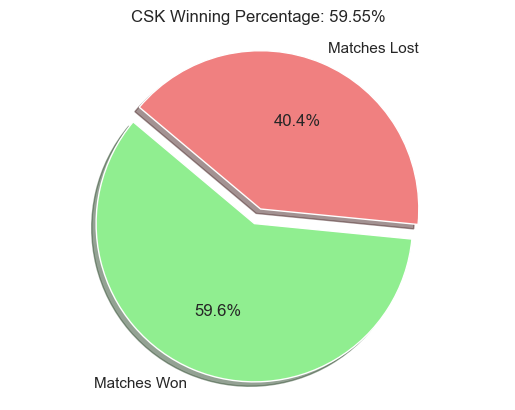

In [211]:
total_matches_played = 178  
matches_won = 106  

winning_percentage = (matches_won / total_matches_played) * 100

labels = ['Matches Won', 'Matches Lost']
sizes = [matches_won, total_matches_played - matches_won]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # To explode the "Matches Won" slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 

# Add a title
plt.title(f'CSK Winning Percentage: {winning_percentage:.2f}%')

# Show the pie chart
plt.show()

**TOSS DECISION COUNTS**

In [212]:
toss_decision_counts = df['toss_decision'].value_counts()
colors=['Teal','aqua']

bar_fig = go.Figure(data=[
    go.Bar(name='TOSS DECISION COUNTS', x=toss_decision_counts.index, y=toss_decision_counts.values, texttemplate='%{y}',textposition='auto',marker=dict(color=colors))
])


pie_fig = go.Figure(data=[go.Pie(labels=toss_decision_counts.index[:10], values=toss_decision_counts.values[:10],marker=dict(colors=colors)),])
pie_fig.update_traces(domain=dict(x=[0.8, 1.0], y=[0.0, 1.0]), textinfo='percent+label' )


fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.2])
fig.add_trace(bar_fig.data[0])
fig.add_trace(pie_fig.data[0])

fig.update_xaxes(title_text='Toss_Decision', row=1, col=1)
fig.update_yaxes(title_text='Count of Toss', row=1, col=1)
fig.update_layout(title='TOSS DECISION COUNTS')

fig.show()

 **Toss Decision**

In [213]:
sizes = df['toss_decision'].value_counts()
labels = sizes.index
# Define the colors
colors = ['#93B40D', '#0DB4A2']
# Create a pie chart in Plotly
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=sizes,
    textinfo='percent+label',
    marker=dict(colors=colors),
    hole=0.6  # To create a white circle in the center
)])

fig.update_layout(
    title='Toss Decision Distribution',
    annotations=[dict(text='Total', x=0.5, y=0.5, font_size=20, showarrow=False)]
)
fig.show()


In [214]:
venue_counts = df['venue'].value_counts()
print(venue_counts)

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

Analysis: we can determine the venues with the highest and lowest match counts.it shows the number of matches played at each venue 


**IPL Matches Hosted in Various Cities**

In [215]:
colors=['#0072B2', '#D55E00',' #009E73', '#CC79A7',' #F0E442',' #56B4E9' ,'#E69F00', '#D55E00',' #0092DD',' #8C564B ','#34BC6E','#A08C69']
bar_fig = go.Figure(data=[
    go.Bar(name='Venue Counts', x=venue_counts.index[0:10], y=venue_counts.values[0:10],texttemplate='%{y}', textposition='auto',marker=dict(color=colors[:10]))
])


pie_fig = go.Figure(data=[go.Pie(labels=venue_counts.index[:10], values=venue_counts.values[:10],marker=dict(colors=colors))])
pie_fig.update_traces(domain=dict(x=[0.8, 1.0], y=[0.0, 0.9]), textinfo='percent' )


fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.2])
fig.add_trace(bar_fig.data[0])
fig.add_trace(pie_fig.data[0])

fig.update_xaxes(title_text='Venue Names', row=1, col=1)
fig.update_yaxes(title_text='Counts', row=1, col=1)
fig.update_layout(title='Venue Counts')

fig.show()

In [216]:
venue_counts = df['venue'].value_counts().reset_index()
venue_counts.columns = ['Venue', 'Number of Matches']

fig = px.bar(venue_counts, x='Venue', y='Number of Matches',
             title='Number of Matches Held in Each Venue')

# Customize the appearance of the bar chart
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability

fig.update_traces(text=venue_counts['Number of Matches'], textposition='outside')

# Show the plot
fig.show()

**Number of Matches Won by Toss Results**

In [217]:
toss_results = df['toss_winner'].value_counts()
fig = px.bar(x=toss_results.index, y=toss_results.values, color=toss_results.index)
fig.update_layout(title='Number of Matches Won by Toss Results',
                  xaxis_title='Team',
                  yaxis_title='Number of Matches Won')

fig.update_traces(text=toss_results.values, textposition='inside')

fig.show()


> Analysis: By above bar graph we can see that Mumbai Indians won toss most times and matches also compare to other teams.

In [218]:
player_counts  = df['player_of_match'].value_counts()[:10]
print(player_counts )

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
G Gambhir         13
V Kohli           13
Name: player_of_match, dtype: int64


Analysis: Among all the players in the IPL dataset, AB de Villiers has been awarded the "Player of the Match" the most number of times.

In [219]:
colors=['#D98880','#566573','#D68910','#117A65','#58D68D','#D35400','#FA8072','#3498DB', '#633974','#CB7CD9']

bar_fig = go.Figure(data=[
    go.Bar(name='Player of the Match', x=player_counts.index, y=player_counts.values, textposition='auto',texttemplate='%{y}', marker=dict(color=colors[:10]))
])



pie_fig = go.Figure(data=[go.Pie(labels=player_counts.index[:10], values=player_counts.values[:10],marker=dict(colors=colors))])
pie_fig.update_traces(domain=dict(x=[0.8, 1.0], y=[0.0, 1.0]), textinfo='percent' )


fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.2])
fig.add_trace(bar_fig.data[0])
fig.add_trace(pie_fig.data[0])

fig.update_xaxes(title_text='Player of the Match', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_layout(title='Player of the Match')

fig.show()

> **Performance of top 5 cities throughout different Years(2008-2020)**

In [220]:
# Assuming 'df' contains the IPL data

# CSK
CSK_df = df[df['wins'] == 'CSK'].groupby('season')['wins'].count().reset_index(name='Count')
CSK_df = CSK_df.sort_values(by='season', ascending=True)

# MI
MI_df = df[df['wins'] == 'MI'].groupby('season')['wins'].count().reset_index(name='Count')
MI_df = MI_df.sort_values(by='season', ascending=True)

# KKR
KKR_df = df[df['wins'] == 'KKR'].groupby('season')['wins'].count().reset_index(name='Count')
KKR_df = KKR_df.sort_values(by='season', ascending=True)

# DC
DC_df = df[df['wins'] == 'DC'].groupby('season')['wins'].count().reset_index(name='Count')
DC_df = DC_df.sort_values(by='season', ascending=True)

# SRH
SRH_df = df[df['wins'] == 'SRH'].groupby('season')['wins'].count().reset_index(name='Count')
SRH_df = SRH_df.sort_values(by='season', ascending=True)

# Create individual line plots
fig_CSK = px.line(CSK_df, x='season', y='Count', title='CSK Wins Over Seasons')
fig_MI = px.line(MI_df, x='season', y='Count', title='MI Wins Over Seasons')
fig_KKR = px.line(KKR_df, x='season', y='Count', title='KKR Wins Over Seasons')
fig_DC = px.line(DC_df, x='season', y='Count', title='DC Wins Over Seasons')
fig_SRH = px.line(SRH_df, x='season', y='Count', title='SRH Wins Over Seasons')

# Display the plots
fig_CSK.show()
fig_MI.show()
fig_KKR.show()
fig_DC.show()
fig_SRH.show()

**Number of Matches played by each Team**

In [221]:
colors = ['#0072B2', '#D55E00', '#009E73', '#CC79A7', '#F0E442', '#56B4E9', '#E69F00', '#D55E00', '#0092DD', '#8C564B', '#34BC6E', '#A08C69', '#FF33CC', '#9933FF', '#FF9900']

team_counts = pd.concat([df['team1'], df['team2']]).value_counts().reset_index()
team_counts.columns = ['Team', 'Matches Played']

fig = px.bar(team_counts, x='Matches Played', y='Team', orientation='h',
             title='Number of matches played by each Team',
             color='Team', 
             color_discrete_sequence=colors, 
             labels={'Team': 'Team', 'Matches Played': 'Matches Played'})


fig.update_traces(text=team_counts['Matches Played'], textposition='outside')

fig.show()


<AxesSubplot:>

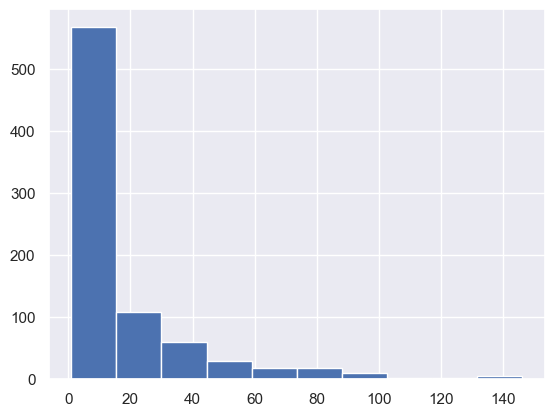

In [222]:
df['result_margin']. hist()

In [223]:
# Counting the occurrences of each combination of WinningTeam and WonBy
count_data = df.groupby(['wins', 'wonby']).size().reset_index(name='Count')

fig = go.Figure()
for won_by in count_data['wonby'].unique():
    subset = count_data[count_data['wonby'] == won_by]
    fig.add_trace(go.Bar(x=subset['wins'], y=subset['Count'],texttemplate='%{y}', name=won_by))
fig.update_layout(
    title="Overall Winning by Runs and Wickets",
    xaxis=dict(title='Winning Team'),
    yaxis=dict(title='Count'),
    barmode='group', 
    xaxis_tickangle=-45, 
)
fig.show()

> Analysis: The analysis of the IPL dataset shows the number of matches won by teams based on wickets and runs.

In [224]:
toss_results = df['toss_winner'].value_counts().reset_index()
toss_results.columns = ['Team', 'Number of Matches Won']

fig = px.bar(toss_results, x='Team', y='Number of Matches Won',
             title='Number of Matches Won by Toss Results',
             labels={'Team': 'Team', 'Number of Matches Won': 'Number of Matches Won'},
             color='Team')

fig.update_traces(text=toss_results['Number of Matches Won'], textposition='outside')

fig.show()

**Umpire Analysis**

In [225]:
import plotly.express as px

umpire_counts = pd.concat([df['umpire1'], df['umpire2']]).value_counts().reset_index()
umpire_counts.columns = ['Umpire', 'Matches']

fig_umpire = px.bar(umpire_counts.head(10), x='Matches', y='Umpire', 
                    orientation='h', title='Top 10 Umpires by Matches')

fig_umpire.update_layout(xaxis_title='Number of Matches', yaxis_title='Umpire')

fig_umpire.show()


I have loaded the IPL Ball-by-Ball dataset to perform a multivariate analysis using a line plot showing the total runs and wickets for each team over different seasons.

In [226]:
ball_by_ball_df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
merged_df = pd.merge(df, ball_by_ball_df, on='id')

team_performance = merged_df.groupby(['season', 'team1'])[['total_runs', 'is_wicket']].sum().reset_index()

fig = px.line(team_performance, x='season', y=['total_runs', 'is_wicket'], color='team1',
              labels={'value': 'Count', 'variable': 'Metric'},
              title='Team Performance Over Seasons',
              width=1000, height=500)

fig.update_layout(
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    hovermode='x',
    xaxis_title='Season',
    yaxis_title='Count',
    font=dict(size=10),
    margin=dict(t=50) 
)

fig.show()

**Distribution**

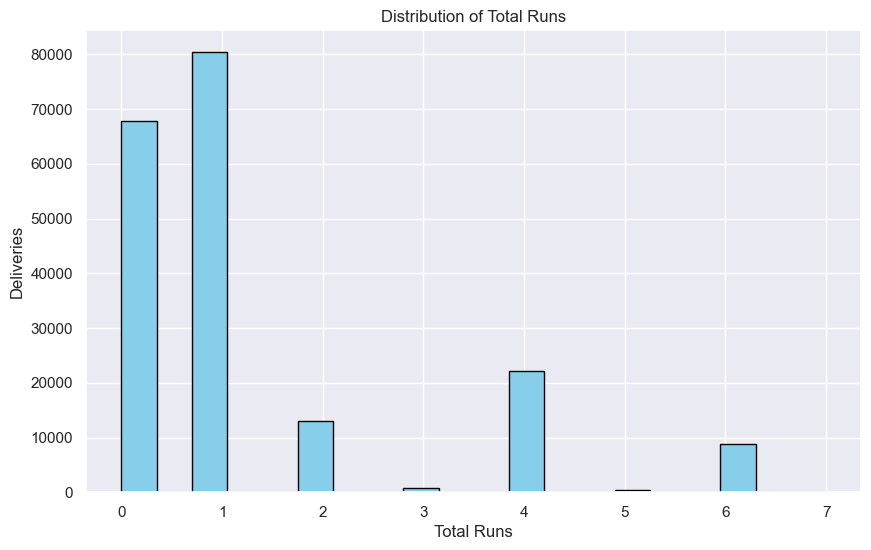

In [227]:
plt.figure(figsize=(10, 6))
plt.hist(ball_by_ball_df['total_runs'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Deliveries')
plt.show()

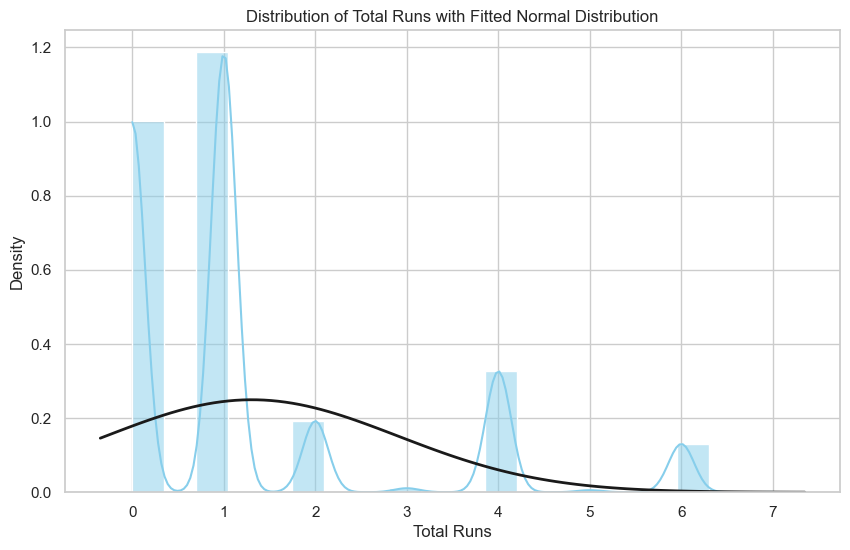

In [228]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(ball_by_ball_df['total_runs'], kde=True, color='skyblue', bins=20, stat='density')

mu, std = norm.fit(ball_by_ball_df['total_runs'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Distribution of Total Runs with Fitted Normal Distribution')
plt.xlabel('Total Runs')
plt.ylabel('Density')
plt.show()

In [229]:
import scipy.stats as stats

winners = df[df['wins'] == 1]['result_margin']
losers = df[df['wins'] == 0]['result_margin']

t_stat, p_value = stats.ttest_ind(winners, losers, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in result margin between winners and losers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in result margin between winners and losers.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference in result margin between winners and losers.


### <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:center;display: inline-block;border-radius:60px;background-color:black;overflow:hidden;font-weight:800">Data Questioning</div>

* Which city has hosted the maximum number of IPL matches?
* What is the winning percentage of each team in ipl?
* Which team has won the most matches in ipl?
* what is the most common toss_decision (fielding or batting) in ipl?

In [230]:
#Which city has hosted the maximum number of IPL matches?


# Group the data by 'City' and count the number of matches in each city
city_match_count = df['city'].value_counts()
# Get the city with the maximum number of matches
max_hosted_city = city_match_count.idxmax()
max_matches = city_match_count.max()
print(f"The city that has hosted the maximum number of IPL matches is {max_hosted_city} with {max_matches} matches.")

The city that has hosted the maximum number of IPL matches is Mumbai with 101 matches.


In [231]:
#What is the winning percentage of each team in ipl?

# Concatenate the 'team1' and 'team2' columns to get a combined list of teams
all_teams = pd.concat([df['team1'], df['team2']])
# Count the number of matches played by each team
matches_played = all_teams.value_counts()
# Count the number of matches won by each team
matches_won = df['winner'].value_counts()
# Calculate the winning percentage for each team
winning_percentage = (matches_won / matches_played) * 100
# Create a DataFrame for the winning percentage data
winning_percentage_df = winning_percentage.reset_index()
winning_percentage_df.columns = ['Team', 'Winning Percentage']
# Create a line graph using Plotly
fig = px.line(winning_percentage_df, x='Team', y='Winning Percentage', title='IPL Team Winning Percentage')
fig.update_xaxes(title_text='Team')
fig.update_yaxes(title_text='Winning Percentage')
# Show the line graph
fig.show()

In [232]:
# Which team has won the most matches in ipl?

all_teams = pd.concat([df['team1'], df['team2']])
team_appearances = all_teams.value_counts()

most_appearances_team = team_appearances.idxmax()
most_appearances = team_appearances.max()
print(f"The IPL team that has played the most matches is {most_appearances_team} with {most_appearances} matches played.")

The IPL team that has played the most matches is Mumbai Indians with 203 matches played.


In [233]:
# What is the most common toss_decision (fielding  or batting) in ipl?

# Count the occurrences of each toss decision
toss_decision_counts = df['toss_decision'].value_counts()
# Get the most common toss decision
most_common_decision = toss_decision_counts.idxmax()
print(f"The most common toss decision in the IPL is '{most_common_decision}'.")

toss_decision_counts = df['toss_decision'].value_counts().reset_index()
toss_decision_counts.columns = ['Toss Decision', 'Count']

fig = px.bar(toss_decision_counts, x='Toss Decision', y='Count', title='Toss Decision Frequency in IPL')
fig.update_xaxes(title_text='Toss Decision')
fig.update_yaxes(title_text='Frequency')

fig.show()

The most common toss decision in the IPL is 'field'.


**Comparative Questions:**

* Is there any correlation between the toss_winner and match_winner in the IPL?
* Comparing the number of matches played in two cities from 2008-2020
* Which team won the toss most and do they tend to win more matches

In [234]:
df.head(1)

,id,city,season,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,wins,wonby,result_margin,umpire1,umpire2
0,335982,Bangalore,2008,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,KKR,runs,140,Asad Rauf,RE Koertzen


In [235]:
# Is there any correlation between the toss_winner and match winner in the ipl?

correlation = df['toss_winner'].eq(df['winner']).corr(df['toss_winner'].eq(df['winner']))
print(f"Correlation between toss winner and match winner: {correlation}")

Correlation between toss winner and match winner: 1.0


> Here 1 indicates a perfect positive correlation between the toss winner and match winner.

**Comparing the number of matches played in Mumbai and Chennai from 2008-2020**

In [236]:
# Filter the data for matches between 2008 and 2020
filtered_df = df[(df['season'] >= 2008) & (df['season'] <= 2020)]

city1 = 'Mumbai'
city2 = 'Chennai'

city1_data = filtered_df[filtered_df['city'] == city1]
city2_data = filtered_df[filtered_df['city'] == city2]

city1_counts = city1_data['season'].value_counts().sort_index()
city2_counts = city2_data['season'].value_counts().sort_index()

fig = go.Figure(data=[
    go.Bar(name=city1, x=city1_counts.index, y=city1_counts),
    go.Bar(name=city2, x=city2_counts.index, y=city2_counts)
])

fig.update_layout(
    title=f'Matches Played Comparison ({city1} vs {city2}) in IPL (2008-2020)',
    xaxis_title='Year',
    yaxis_title='Matches Played',
    barmode='group'
)
fig.update_traces(texttemplate='%{y}', textposition='outside')


fig.show()


In [237]:
# Which team won the toss most and do they tend to win more matches

toss_wins = df['toss_winner'].value_counts().reset_index()
toss_wins.columns = ['Team', 'Toss Wins']

match_wins = df['winner'].value_counts().reset_index()
match_wins.columns = ['Team', 'Match Wins']

combined_data = pd.merge(toss_wins, match_wins, on='Team', how='outer').fillna(0)

fig = px.bar(combined_data, x='Team', y=['Toss Wins', 'Match Wins'],
             title='Toss Wins vs. Match Wins for IPL Teams',
             labels={'value': 'Count', 'variable': 'Wins'},
             category_orders={'Team': combined_data['Team'].tolist()},
             color_discrete_map={'Toss Wins': 'skyblue', 'Match Wins': 'green'})

fig.update_layout(barmode='group')
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()


**CSK Season-wise**

In [238]:
team_to_analyze = 'Chennai Super Kings'

team_data = df[(df['team1'] == team_to_analyze) | (df['team2'] == team_to_analyze)]

team_performance = team_data.groupby(['season', 'winner']).size().unstack(fill_value=0)
team_performance['Total Matches'] = team_performance.sum(axis=1)
team_performance['Winning Percentage'] = (team_performance[team_to_analyze] / team_performance['Total Matches']) * 100

fig = px.line(team_performance, x=team_performance.index, y='Winning Percentage', 
              title=f'{team_to_analyze} Winning Percentage Over Seasons',
              labels={'Winning Percentage': 'Winning Percentage (%)', 'index': 'Season'},
              markers=True)

fig.show()

### <div style="padding:20px;color:yellow;margin:0;font-size:100%;text-align:center;display: inline-block;border-radius:60px;background-color:black;overflow:hidden;font-weight:800">Insights</div>


## Cities
- **Mumbai City** has hosted the most IPL matches, with a count of 120.

## Player of the Match
- **AB de Villiers** has won the most Player of the Match awards, with a total count of 23.

## Overall Winning by Runs and Wickets
- **Mumbai** has the highest number of overall wins in the IPL.
  - Runs: 65%
  - Wickets: 52%
- Chennai and Kolkata have a similar number of overall wins, but Chennai is slightly ahead.
  - CSK Runs: 53%
  - CSK Wickets: 53%

## Venue
- **Eden Gardens** stands out among all IPL venues, hosting more matches than others.

## Toss Wins vs Match Wins for IPL Teams
- **Mumbai** has the highest winning percentage in the IPL.
  - Toss Wins: 106%
  - Match Wins: 120%
- **Chennai** has the second-highest winning percentage.
  - Toss Wins: 97%
  - Match Wins: 106%

## Toss Decision
- Fielding is the most common toss decision, with a percentage of 60.8%.
- Batting is chosen 39.2% of the time.


<div style="text-align: center; font-size: 36px; font-weight: bold; color: #009688; margin-top: 20px;">
  <p>Thank You!</p>
</div>


In [12]:
from ipywidgets import widgets, Layout
from IPython.display import display

rating = widgets.IntSlider(
    value=5,
    min=0,
    max=5,
    step=1,
    description='Rating ⭐:',
    layout=Layout(width='50%')
)

comments = widgets.Textarea(
    value='',
    placeholder='Type your feedback here...',
    description='Comments:',
    layout=Layout(width='50%')
)

display(rating)
display(comments)

IntSlider(value=5, description='Rating ⭐:', layout=Layout(width='50%'), max=5)

Textarea(value='', description='Comments:', layout=Layout(width='50%'), placeholder='Type your feedback here..…